Colocar a frequencia anual pela quantidade de vezes que o veiculo passa pela frequencia, gerar anual

Agrupamento origem destino pesquisa OD

![frequencia](C:\Users\lucas\Desktop\ufrpe\arq\alerta-pandemia\estimativo.png)

In [2]:
import pandas as pd
df = pd.read_excel("PesquisaOD_2016_2017.xlsx", sheet_name=['BD_1PNT2016','BD_2PNT2016'])
#Separando abas do arquivo
df2 = df ['BD_1PNT2016']
df3 = df['BD_2PNT2016']

#*classe* e frequencia
df_merged = pd.concat([df2, df3])
df_merged = df_merged.loc[:, [ 'POrigem', 'MOrigem', 'UFOrigem','GeocodOrigem', 'PDestino', 'MDestino', 'UFDestino','GeocodDestino','Classe', 'QtdPessoasVeic']] 

#Retirando origens e destinos que são diferentes do Brasil
df_merged = df_merged.drop(df_merged[df_merged['PDestino'] != 'Brasil'].index)
df_merged = df_merged.drop(df_merged[df_merged['POrigem'] != 'Brasil'].index)



# Realizar o agrupamento e a soma
df_agrupado = df_merged.groupby(['GeocodOrigem']).agg({'MOrigem':'first','UFOrigem' :'first','MDestino':'first','UFDestino' :'first'})

#'QtdPessoasVeic':'sum',

# Resultado final
display(df_agrupado)


,MOrigem,UFOrigem,MDestino,UFDestino
GeocodOrigem,,,,
1100015.0,Alta Floresta D'Oeste,RO,São Paulo,SP
1100023.0,Ariquemes,RO,Campo Grande,MS
1100031.0,Cabixi,RO,Mirante do Paranapanema,SP
1100049.0,Cacoal,RO,Penha,SC
1100056.0,Cerejeiras,RO,Cerejeiras,RO
...,...,...,...,...
5221908.0,Varjão,GO,Comodoro,MT
5222005.0,Vianópolis,GO,Brasília,DF
5222054.0,Vicentinópolis,GO,Feliz Natal,MT


Considerar eventualmente como unitário

Filtrar considerar_parOD = 1 e considerar_socio = 1 

Fazer a normalização anual antes do agrupamento *Origem*

Exibir: Origem, Destino, Classe(Veiculo), Frequencia(ano), Quantidade de pessoas(ano)

Agrupar mesmo par origem destino por *classe*

In [ ]:
# Normalização da frequencia anual!

df_merged2 = pd.concat([df2, df3])

df_merged2 = df_merged2.loc[:, [ 'POrigem', 'MOrigem', 'UFOrigem','GeocodOrigem', 'PDestino', 'MDestino', 'UFDestino','GeocodDestino', 'FreqPeriodo','FreqQnt','Classe', 'QtdPessoasVeic','considerar_parOD?','considerar_socio?']] 

#Retirando origens e destinos que são diferentes do Brasil
df_merged2 = df_merged2.drop(df_merged2[df_merged2['PDestino'] != 'Brasil'].index)
df_merged2 = df_merged2.drop(df_merged2[df_merged2['POrigem'] != 'Brasil'].index)
df_merged2 = df_merged2.drop(df_merged2[df_merged2['FreqPeriodo'] == 'Informação não registrada'].index)
df_merged2 = df_merged2.drop(df_merged2[df_merged2['QtdPessoasVeic'] == 'Informação não registrada'].index)
df_merged2 = df_merged2.drop(df_merged2[df_merged2['considerar_parOD?'] == '0'].index)
df_merged2 = df_merged2.drop(df_merged2[df_merged2['considerar_socio?'] == '0'].index)
df_merged2 = df_merged2.dropna(subset=['QtdPessoasVeic'])
df_merged2['FreqQnt'] = df_merged2['FreqQnt'].replace('>10', 11)

#Calculando frequencias
def multiplicar_frequencia(row):
    quantidade_pessoas = row['QtdPessoasVeic']
    frequencia = row['FreqPeriodo']
    frequenciaQtd = row['FreqQnt']

    if frequencia == 'Semana':
        return quantidade_pessoas*(frequenciaQtd * 52) 
    elif frequencia == 'Dia':
        return quantidade_pessoas*(frequenciaQtd * 365)
    elif frequencia == 'Mes':
        return quantidade_pessoas*(frequenciaQtd * 12)
    else: #ano ou eventualmente!
        return quantidade_pessoas

df_merged2['TotalPessoas_Ano'] = df_merged2.apply(multiplicar_frequencia, axis=1)
dfRes = df_merged2.loc[:, ['MOrigem', 'UFOrigem','GeocodOrigem','MDestino', 'UFDestino','GeocodDestino', 'FreqPeriodo','FreqQnt','Classe', 'QtdPessoasVeic','TotalPessoas_Ano']] 
display(dfRes)

,MOrigem,UFOrigem,GeocodOrigem,MDestino,UFDestino,GeocodDestino,FreqPeriodo,FreqQnt,Classe,QtdPessoasVeic,TotalPessoas_Ano
0,Seberi,RS,4320206.0,Tramandaí,RS,4321600.0,Mês,1,P3,2,2
1,São José do Inhacorá,RS,4318499.0,Seberi,RS,4320206.0,Mês,1,P3,2,2
3,Palmitinho,RS,4313805.0,Jaboticaba,RS,4310850.0,Mês,1,P1,3,3
4,Seberi,RS,4320206.0,Palmeira das Missões,RS,4313706.0,Semana,1,P3,2,104
5,Pinheirinho do Vale,RS,4314498.0,Esteio,RS,4307708.0,Ano,1,P1,3,3
...,...,...,...,...,...,...,...,...,...,...,...
296931,Colinas,MA,2103505.0,Passagem Franca,MA,2107902.0,Dia,2,M,2,1460
296933,Colinas,MA,2103505.0,Parnarama,MA,2107803.0,Semana,1,P1,3,156
296934,São Luis,MA,2111300.0,São João dos Patos,MA,2111102.0,Mês,1,M,1,1
296935,Colinas,MA,2103505.0,Parnarama,MA,2107803.0,Dia,1,P1,2,730


In [ ]:
#'MOrigem', 'UFOrigem','GeocodOrigem','MDestino', 'UFDestino','GeocodDestino', 'FreqPeriodo','FreqQnt','Classe', 'QtdPessoasVeic','TotalPessoas_Ano'
# Realizar o agrupamento e a soma
dfRes.to_csv('AnualGeral.csv', index=False)

fatores = [ 'O1','O2','O3','P2']

# Filtrar os valores da coluna com base nos transportes
DFfiltrado = dfRes[dfRes['Classe'].isin(fatores)]

DFagrup = dfRes.groupby(['GeocodOrigem','Classe']).agg({'MOrigem':'first','UFOrigem' :'first','MDestino':'first','UFDestino' :'first','GeocodDestino':'first','TotalPessoas_Ano':'sum'})
DFfiltrado = DFfiltrado.groupby(['GeocodOrigem','Classe']).agg({'MOrigem':'first','UFOrigem' :'first','MDestino':'first','UFDestino' :'first','GeocodDestino':'first','TotalPessoas_Ano':'sum'})

display(DFagrup)
display(DFfiltrado)
DFagrup.to_csv('AnualAgrupado.csv', index=True)
DFfiltrado.to_csv('OnibusAgrupado.csv', index=True)

MOrigem UFOrigem         MDestino  \
GeocodOrigem Classe                                                    
1100015.0    M       Alta Floresta D'Oeste       RO        Ji-Paraná   
             P1      Alta Floresta D'Oeste       RO           Cuiabá   
             P3      Alta Floresta D'Oeste       RO    Vale do Anari   
1100023.0    M                   Ariquemes       RO        Ariquemes   
             O1                  Ariquemes       RO          Cujubim   
...                                    ...      ...              ...   
5300108.0    O1                   Brasília       DF         Curitiba   
             O2                   Brasília       DF    Florianópolis   
             P1                   Brasília       DF          Corumbá   
             P2                   Brasília       DF  Nova Petrópolis   
             P3                   Brasília       DF           Bonito   

                    UFDestino  GeocodDestino  TotalPessoas_Ano  
GeocodOrigem Classe                                             
1100015.0    M             RO      1100122.0               104  
             P1            MT      5103403.0                29  
             P3            RO      1101757.0               312  
1100023.0    M             RO      1100023.0            163337  
             O1            RO      1100940.0            153034  
...                       ...            ...               ...  
5300108.0    O1            PR      4106902.0             42043  
             O2            SC      4205407.0             37329  
             P1            MS      5003207.0            142696  
             P2            RS      4313201.0              1681  
             P3            MS      5002209.0             17580  

[11420 rows x 6 columns]

MOrigem UFOrigem              MDestino UFDestino  \
GeocodOrigem Classe                                                       
1100023.0    O1      Ariquemes       RO               Cujubim        RO   
             O2      Ariquemes       RO         Guajará-Mirim        RO   
             O3      Ariquemes       RO           Porto Velho        RO   
             P2      Ariquemes       RO          Alto Paraíso        RO   
1100049.0    O2         Cacoal       RO      Pontes e Lacerda        MT   
...                        ...      ...                   ...       ...   
5221601.0    O1         Uruaçu       GO                Uruaçu        GO   
             P2         Uruaçu       GO  Nova Iguaçu de Goiás        GO   
5300108.0    O1       Brasília       DF              Curitiba        PR   
             O2       Brasília       DF         Florianópolis        SC   
             P2       Brasília       DF       Nova Petrópolis        RS   

                     GeocodDestino  TotalPessoas_Ano  
GeocodOrigem Classe                                   
1100023.0    O1          1100940.0            153034  
             O2          1100106.0                14  
             O3          1100205.0                52  
             P2          1100403.0             18982  
1100049.0    O2          5106752.0             51501  
...                            ...               ...  
5221601.0    O1          5221601.0            368115  
             P2          5214879.0             34915  
5300108.0    O1          4106902.0             42043  
             O2          4205407.0             37329  
             P2          4313201.0              1681  

[2383 rows x 6 columns]

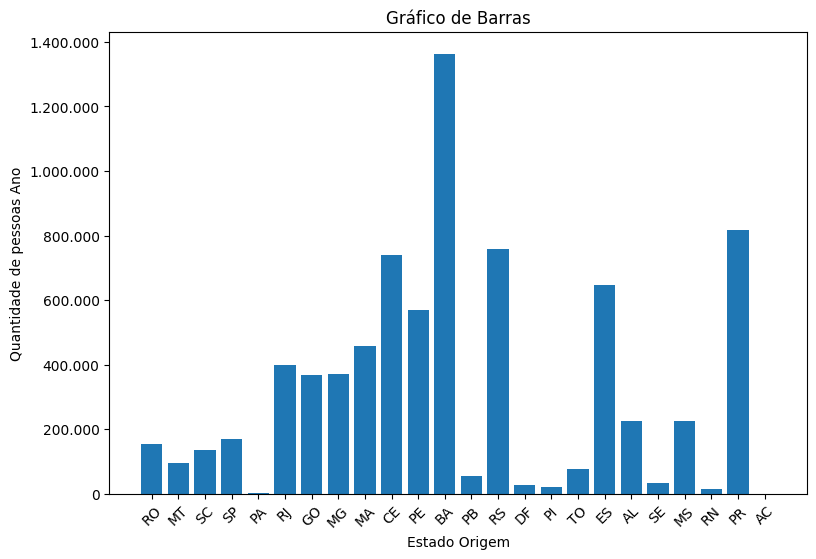

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker



# Plotar gráfico de barras
plt.figure(figsize=(9, 6))
plt.bar(DFfiltrado['UFDestino'], DFfiltrado['TotalPessoas_Ano'])
plt.xlabel('Estado Destino')
plt.ylabel('Quantidade de pessoas Ano')
plt.title('Gráfico de Barras')
plt.xticks(rotation=45)

#Tirar formatação dos numeros
plt.ticklabel_format(style='plain', axis='y')
formatter = ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x).replace(',', '.'))
plt.gca().get_yaxis().set_major_formatter(formatter)

plt.show()

*Frequencia semanal* frequencia de saida de veiculo e total de pessoas

FreqQtd, FreqPeriodo e total de pessoas 

Pesquisar formas de comparar os dados!

scatter plot com cada origem destino e pra cada estado

Tableau

Pandas

In [6]:
# Normalização da frequencia anual!

DFmerged3 = pd.concat([df2, df3])

DFmerged3 = DFmerged3.loc[:, [ 'POrigem', 'MOrigem', 'UFOrigem','GeocodOrigem', 'PDestino', 'MDestino', 'UFDestino','GeocodDestino', 'FreqPeriodo','FreqQnt','Classe', 'QtdPessoasVeic','considerar_parOD?','considerar_socio?']] 

#Retirando origens e destinos que são diferentes do Brasil
DFmerged3 = DFmerged3.drop(DFmerged3[DFmerged3['PDestino'] != 'Brasil'].index)
DFmerged3 = DFmerged3.drop(DFmerged3[DFmerged3['POrigem'] != 'Brasil'].index)
DFmerged3 = DFmerged3.drop(DFmerged3[DFmerged3['FreqPeriodo'] == 'Informação não registrada'].index)
DFmerged3 = DFmerged3.drop(DFmerged3[DFmerged3['QtdPessoasVeic'] == 'Informação não registrada'].index)
DFmerged3 = DFmerged3.drop(DFmerged3[DFmerged3['considerar_parOD?'] == '0'].index)
DFmerged3 = DFmerged3.drop(DFmerged3[DFmerged3['considerar_socio?'] == '0'].index)
DFmerged3 = DFmerged3.dropna(subset=['QtdPessoasVeic'])
DFmerged3['FreqQnt'] = DFmerged3['FreqQnt'].replace('>10', 11)

#Calculando frequencias
def multiplicarfrequencia(row):

    frequencia = row['FreqPeriodo']
    frequenciaQtd = row['FreqQnt']

    if frequencia == 'Semana':
        return  frequenciaQtd
    elif frequencia == 'Dia':
        return (frequenciaQtd * 7)
    elif frequencia == 'Mes':
        return (frequenciaQtd / 4)
    else: #ano ou eventualmente!
        return (frequenciaQtd / 52)

DFmerged3['FreqSem'] = DFmerged3.apply(multiplicarfrequencia, axis=1)
dfRes3 = DFmerged3.loc[:, ['MOrigem', 'UFOrigem','GeocodOrigem','MDestino', 'UFDestino','GeocodDestino', 'FreqPeriodo','FreqQnt','Classe','FreqSem', 'QtdPessoasVeic']] 
display(dfRes3)

#'MOrigem', 'UFOrigem','GeocodOrigem','MDestino', 'UFDestino','GeocodDestino', 'FreqPeriodo','FreqQnt','Classe', 'QtdPessoasVeic'
# Realizar o agrupamento e a soma
dfRes3.to_csv('AnualGeral.csv', index=False)

fatores3 = [ 'O1','O2','O3','P2']

# Filtrar os valores da coluna com base nos transportes
DFfiltrado3 = dfRes3[dfRes3['Classe'].isin(fatores3)]

DFagrup3 = dfRes3.groupby(['GeocodOrigem','Classe']).agg({'MOrigem':'first','UFOrigem' :'first','MDestino':'first','UFDestino' :'first','GeocodDestino':'first','FreqSem':'sum','QtdPessoasVeic':'sum'})
DFfiltrado3 = DFfiltrado3.groupby(['GeocodOrigem','Classe']).agg({'MOrigem':'first','UFOrigem' :'first','MDestino':'first','UFDestino' :'first','GeocodDestino':'first','FreqSem':'sum','QtdPessoasVeic':'sum'})

display(DFagrup3)
display(DFfiltrado3)
DFagrup3.to_csv('SemAgrupado.csv', index=True)
DFfiltrado3.to_excel('OnibusAgrupadoSem.xlsx', index=True)

,MOrigem,UFOrigem,GeocodOrigem,MDestino,UFDestino,GeocodDestino,FreqPeriodo,FreqQnt,Classe,FreqSem,QtdPessoasVeic
0,Seberi,RS,4320206.0,Tramandaí,RS,4321600.0,Mês,1,P3,0.019231,2
1,São José do Inhacorá,RS,4318499.0,Seberi,RS,4320206.0,Mês,1,P3,0.019231,2
3,Palmitinho,RS,4313805.0,Jaboticaba,RS,4310850.0,Mês,1,P1,0.019231,3
4,Seberi,RS,4320206.0,Palmeira das Missões,RS,4313706.0,Semana,1,P3,1.000000,2
5,Pinheirinho do Vale,RS,4314498.0,Esteio,RS,4307708.0,Ano,1,P1,0.019231,3
...,...,...,...,...,...,...,...,...,...,...,...
296931,Colinas,MA,2103505.0,Passagem Franca,MA,2107902.0,Dia,2,M,14.000000,2
296933,Colinas,MA,2103505.0,Parnarama,MA,2107803.0,Semana,1,P1,1.000000,3
296934,São Luis,MA,2111300.0,São João dos Patos,MA,2111102.0,Mês,1,M,0.019231,1
296935,Colinas,MA,2103505.0,Parnarama,MA,2107803.0,Dia,1,P1,7.000000,2


MOrigem UFOrigem         MDestino  \
GeocodOrigem Classe                                                    
1100015.0    M       Alta Floresta D'Oeste       RO        Ji-Paraná   
             P1      Alta Floresta D'Oeste       RO           Cuiabá   
             P3      Alta Floresta D'Oeste       RO    Vale do Anari   
1100023.0    M                   Ariquemes       RO        Ariquemes   
             O1                  Ariquemes       RO          Cujubim   
...                                    ...      ...              ...   
5300108.0    O1                   Brasília       DF         Curitiba   
             O2                   Brasília       DF    Florianópolis   
             P1                   Brasília       DF          Corumbá   
             P2                   Brasília       DF  Nova Petrópolis   
             P3                   Brasília       DF           Bonito   

                    UFDestino  GeocodDestino      FreqSem QtdPessoasVeic  
GeocodOrigem Classe                                                       
1100015.0    M             RO      1100122.0     2.000000              1  
             P1            MT      5103403.0     0.442308             29  
             P3            RO      1101757.0     2.000000              3  
1100023.0    M             RO      1100023.0  2622.673077            440  
             O1            RO      1100940.0    93.000000            269  
...                       ...            ...          ...            ...  
5300108.0    O1            PR      4106902.0    21.596154            610  
             O2            SC      4205407.0    43.730769            644  
             P1            MS      5003207.0  1451.192308          10758  
             P2            RS      4313201.0    21.134615            186  
             P3            MS      5002209.0   205.980769           1361  

[11420 rows x 7 columns]

MOrigem UFOrigem              MDestino UFDestino  \
GeocodOrigem Classe                                                       
1100023.0    O1      Ariquemes       RO               Cujubim        RO   
             O2      Ariquemes       RO         Guajará-Mirim        RO   
             O3      Ariquemes       RO           Porto Velho        RO   
             P2      Ariquemes       RO          Alto Paraíso        RO   
1100049.0    O2         Cacoal       RO      Pontes e Lacerda        MT   
...                        ...      ...                   ...       ...   
5221601.0    O1         Uruaçu       GO                Uruaçu        GO   
             P2         Uruaçu       GO  Nova Iguaçu de Goiás        GO   
5300108.0    O1       Brasília       DF              Curitiba        PR   
             O2       Brasília       DF         Florianópolis        SC   
             P2       Brasília       DF       Nova Petrópolis        RS   

                     GeocodDestino     FreqSem QtdPessoasVeic  
GeocodOrigem Classe                                            
1100023.0    O1          1100940.0   93.000000            269  
             O2          1100106.0    0.038462             14  
             O3          1100205.0    1.000000              1  
             P2          1100403.0   28.057692             15  
1100049.0    O2          5106752.0   34.442308            380  
...                            ...         ...            ...  
5221601.0    O1          5221601.0  347.038462            461  
             P2          5214879.0   90.000000             85  
5300108.0    O1          4106902.0   21.596154            610  
             O2          4205407.0   43.730769            644  
             P2          4313201.0   21.134615            186  

[2383 rows x 7 columns]

In [26]:
from os import sep
import pandas as pd

dfroAd = pd.read_excel("Base_de_dados_ligacoes_rodoviarias_e_hidroviarias_2016.xlsx", sheet_name=['Base de dados'])
dfrod2 =dfroAd ['Base de dados']

dfrod2 = dfrod2.loc[:, [ 'UF_A', 'CODMUNDV_A', 'NOMEMUN_A','UF_B', 'CODMUNDV_B', 'NOMEMUN_B','VAR07']]

dfRod = dfrod2.groupby(['CODMUNDV_A']).agg({'UF_A':'first','CODMUNDV_A' :'first','NOMEMUN_A':'first','CODMUNDV_B':'first','UF_B' :'first','NOMEMUN_B':'first','VAR07':'sum'})
dfRod = dfRod.rename(columns={'CODMUNDV_A': 'GeocodOrigem', 'CODMUNDV_B': 'GeocodDestino'})

display(dfRod)
dfRod.to_excel('rodoviario1.xlsx', index=True)

,UF_A,GeocodOrigem,NOMEMUN_A,GeocodDestino,UF_B,NOMEMUN_B,VAR07
CODMUNDV_A,,,,,,,
1100015,RO,1100015,Alta Floresta D'Oeste,1100189,RO,Pimenta Bueno,218.00
1100023,RO,1100023,Ariquemes,5217203,GO,Piranhas,4386.50
1100031,RO,1100031,Cabixi,1100064,RO,Colorado do Oeste,20.00
1100049,RO,1100049,Cacoal,5107578,MT,Rondolândia,3407.25
1100056,RO,1100056,Cerejeiras,1101468,RO,Pimenteiras do Oeste,291.00
...,...,...,...,...,...,...,...
5221809,GO,5221809,Urutaí,5222005,GO,Vianópolis,42.00
5221858,GO,5221858,Valparaíso de Goiás,5222005,GO,Vianópolis,11.00
5222005,GO,5222005,Vianópolis,5300108,DF,Brasília,35.00


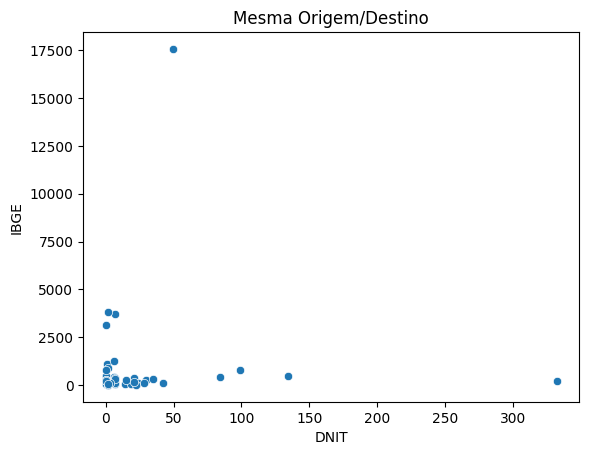

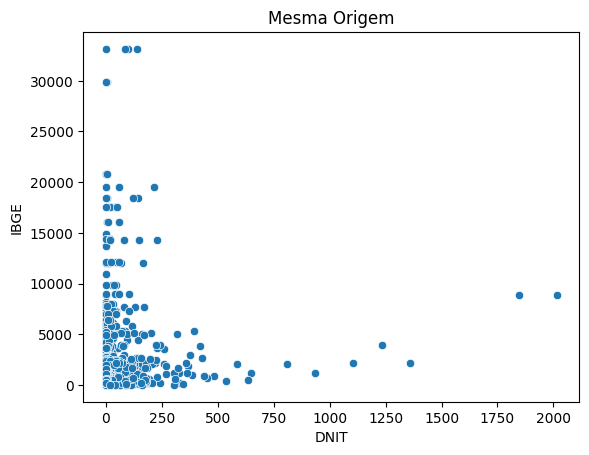

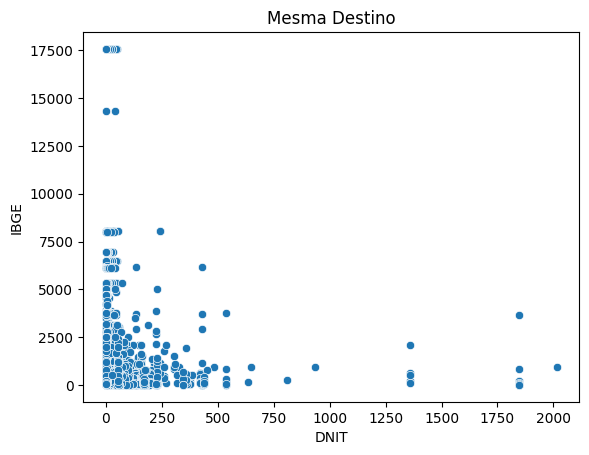

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

dados_combinados = pd.merge(DFfiltrado3,dfRod , on=['GeocodOrigem','GeocodDestino'])
dados_combinados1 = pd.merge(DFfiltrado3,dfRod , on=['GeocodOrigem'])
dados_combinados2 = pd.merge(DFfiltrado3,dfRod , on=['GeocodDestino'])
dados_combinados = dados_combinados.rename(columns={'FreqSem': 'FrequenciaDNIT', 'VAR07': 'FrequenciaIGBE'})
dados_combinados1 = dados_combinados1.rename(columns={'FreqSem': 'FrequenciaDNIT', 'VAR07': 'FrequenciaIGBE'})
dados_combinados2 = dados_combinados2.rename(columns={'FreqSem': 'FrequenciaDNIT', 'VAR07': 'FrequenciaIGBE'})

dfRod.to_csv('baseIBGE.csv', index=False)
DFfiltrado3.to_csv('baseDNIT.csv', index=False)

sns.scatterplot(x='FrequenciaDNIT', y='FrequenciaIGBE', data=dados_combinados)
plt.xlabel('DNIT')
plt.ylabel('IBGE')
plt.title('Mesma Origem/Destino')
plt.show()

sns.scatterplot(x='FrequenciaDNIT', y='FrequenciaIGBE', data=dados_combinados1)
plt.xlabel('DNIT')
plt.ylabel('IBGE')
plt.title('Mesma Origem')
plt.show()

sns.scatterplot(x='FrequenciaDNIT', y='FrequenciaIGBE', data=dados_combinados2)
plt.xlabel('DNIT')
plt.ylabel('IBGE')
plt.title('Mesma Destino')
plt.show()

In [30]:
dfRod.to_csv('baseIBGE.csv', index=False)
DFfiltrado3.to_csv('baseDNIT.csv', index=False)
dfRod.to_excel('baseIBGE.xlsx', index=True)
DFfiltrado3.to_excel('baseDNIT.xlsx', index=True)

Ajustar escalas
Gerar conclusão/resumo das informações obtidas(ppt)
Listar pares que aparecem no IGBE mas não estão no DNIT
Gerar visualização por estado

KeyError: 'index'

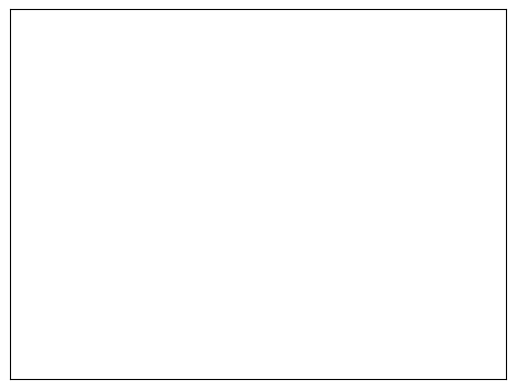

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.sankey import Sankey

sankey = Sankey()

for index, row in dados_combinados.iterrows():
    sankey.add(
        flows=row['FrequenciaDNIT'],
        labels=row['MOrigem'],
        orientations=[row['index']]
    )

sankey.finish()


# Mostre o diagrama Sankey
plt.show()


In [ ]:

DFplot2 = dfRod.groupby(['UF_A']).agg({'UF_A':'first','CODMUNDV_A' :'first','NOMEMUN_A':'first','UF_B' :'first','NOMEMUN_B':'first','VAR07':'sum'})
DFplot1 = DFfiltrado3.groupby(['UFOrigem']).agg({'MOrigem':'first','UFOrigem' :'first','MDestino':'first','UFDestino' :'first','GeocodDestino':'first','FreqSem':'sum'})
display(DFplot1)
display(DFplot2)

,MOrigem,UFOrigem,MDestino,UFDestino,GeocodDestino,FreqSem
UFOrigem,,,,,,
AC,Cruzeiro do Sul,AC,Vilhena,RO,1100304.0,0.038462
AL,Arapiraca,AL,Presidente Prudente,SP,3541406.0,2.230769
AM,Manaquiri,AM,Itamonte,MG,3133006.0,0.115385
AP,Macapá,AP,Brasília,DF,5300108.0,0.038462
BA,Abaré,BA,Salvador,BA,2927408.0,8855.923077
CE,Acaraú,CE,Juazeiro do Norte,CE,2307304.0,4392.096154
DF,Brasília,DF,Curitiba,PR,4106902.0,86.461538
ES,Afonso Cláudio,ES,Três Lagoas,MS,5008305.0,853.442308
GO,Abadia de Goiás,GO,Imperatriz,MA,2105302.0,1426.173077


,UF_A,CODMUNDV_A,NOMEMUN_A,UF_B,NOMEMUN_B,VAR07
UF_A,,,,,,
AC,AC,1200013,Acrelândia,AC,Rio Branco,4646.00
AL,AL,2700102,Água Branca,SP,São Paulo,53599.00
AM,AM,1300029,Alvarães,AM,Manaus,6907.25
AP,AP,1600055,Serra do Navio,AP,Porto Grande,1959.00
BA,BA,2900108,Abaíra,BA,Barra da Estiva,316578.00
CE,CE,2300101,Abaiara,CE,Juazeiro do Norte,164563.50
DF,DF,5300108,Brasília,PAR,Assuncion,15.00
ES,ES,3200102,Afonso Cláudio,ES,Santa Teresa,57825.00
GO,GO,5200050,Abadia de Goiás,GO,Paraúna,82883.50


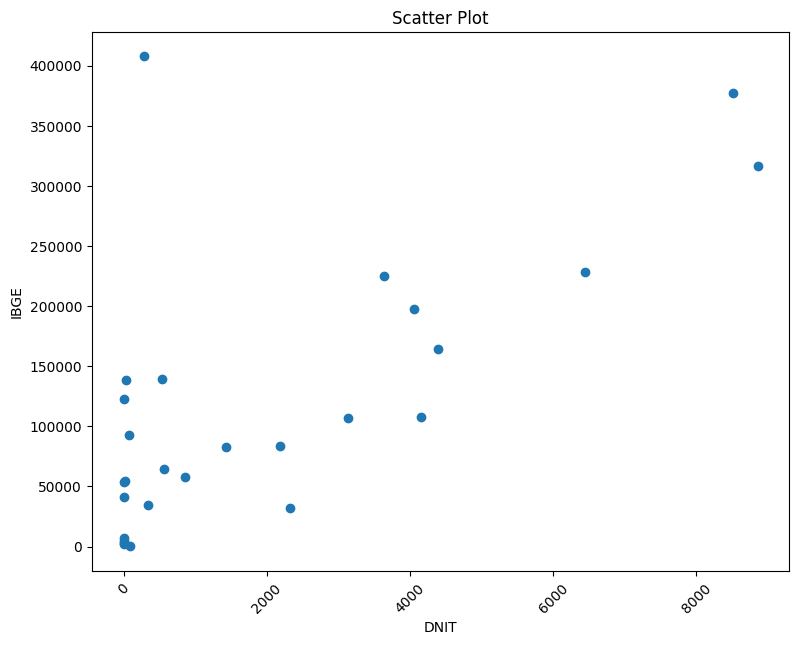

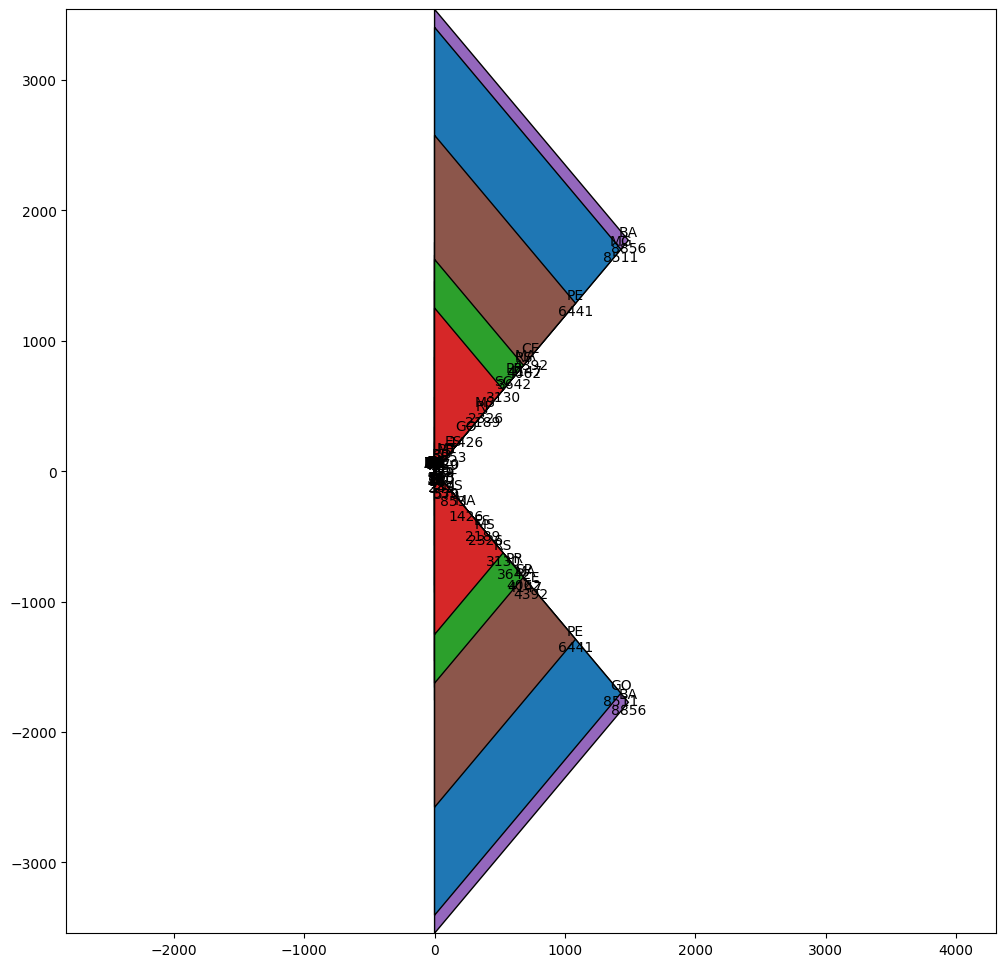

In [ ]:
from matplotlib.sankey import Sankey
import matplotlib.pyplot as plt

#seaborn

plt.figure(figsize=(9, 7))
plt.title('Scatter Plot')
plt.xticks(rotation=45)

# Fazer o scatter plot
plt.scatter(DFplot1['FreqSem'], DFplot2['VAR07'])


# Adicionar rótulos nos eixos
plt.xlabel('DNIT')
plt.ylabel('IBGE')

# Exibir o gráfico
plt.show()


# Crie a figura e os eixos
fig, ax = plt.subplots(figsize=(12, 12))

# Crie o objeto Sankey com os eixos definidos
sankey = Sankey(ax=ax, scale=0.4, offset=0.2, format='%.0f', unit='')

# Acompanhe a posição dos fluxos
pos = {}

# Adicione os fluxos e rótulos ao objeto Sankey
for i in range(len(DFplot1)):
    flows = [DFplot1['FreqSem'][i]] * 2
    labels = [DFplot1['UFOrigem'][i], DFplot1['UFDestino'][i]]
    # Verifique se a posição já está ocupada e ajuste o espaçamento
    prior = pos.get(labels[0], 0) + pos.get(labels[1], 0)
    pos[labels[0]] = prior + 1
    pos[labels[1]] = prior + 1
    sankey.add(flows=flows, labels=labels)

# Plote o gráfico de Sankey
sankey.finish()

# Exiba o gráfico
plt.show()

ValueError: Unrecognized marker style ['o', 's', '^', 'v', 'D', 'p', 'h', 'X', '*', 'P', 'o', 's', '^', 'v', 'D', 'p', 'h', 'X', '*', 'P', 'o', 's', '^', 'v', 'D', 'p', 'h']

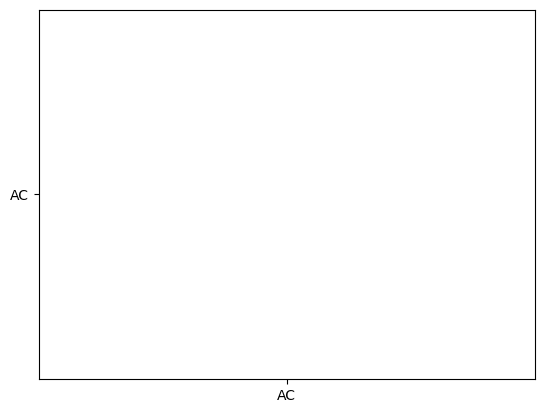

In [ ]:


marcadores = {
    'AC': 'o', 'AL': 's', 'AM': '^', 'AP': 'v', 'BA': 'D', 'CE': 'p', 'DF': 'h', 'ES': 'X', 'GO': '*', 'MA': 'P',
    'MG': 'o', 'MS': 's', 'MT': '^', 'PA': 'v', 'PB': 'D', 'PE': 'p', 'PI': 'h', 'PR': 'X', 'RJ': '*', 'RN': 'P',
    'RO': 'o', 'RR': 's', 'RS': '^', 'SC': 'v', 'SE': 'D', 'SP': 'p', 'TO': 'h'
}

DFplot1['marcador'] = DFplot1['UFOrigem'].map(marcadores)
DFplot2['marcador'] = DFplot2['UF_A'].map(marcadores)

# Faça o scatter plot usando a coluna "marcador"
plt.scatter(DFplot1['UFOrigem'], DFplot2['UF_A'], marker=DFplot1['marcador'].tolist())


# Adicione a legenda
legend_elements = [plt.Line2D([0], [0], marker=marcadores[UFOrigem], color='w', label=UFOrigem) for UFOrigem in DFplot1['UFOrigem'].unique()]
plt.legend(handles=legend_elements)



# Adicione rótulos nos eixos
plt.xlabel('ANTT')
plt.ylabel('IBGE')

# Exiba o gráfico
plt.show()